In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## Get data

In [2]:
data=pd.read_csv('laptops.csv')

In [3]:
data.head()

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0 / 5
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,3.3 / 5
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0 / 5
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0 / 5
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0 / 5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           205 non-null    object 
 1   laptop_name     204 non-null    object 
 2   display_size    205 non-null    float64
 3   processor_type  205 non-null    object 
 4   graphics_card   205 non-null    object 
 5   disk_space      205 non-null    object 
 6   discount_price  205 non-null    float64
 7   old_price       205 non-null    float64
 8   ratings_5max    205 non-null    object 
dtypes: float64(3), object(6)
memory usage: 14.5+ KB


In [5]:
data.nunique()

brand               9
laptop_name       134
display_size       11
processor_type     26
graphics_card      52
disk_space         30
discount_price    124
old_price         104
ratings_5max       16
dtype: int64

## Clean data

In [6]:
laptops=data.rename(columns={'old_price':'list_price'})
laptops.head()

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,list_price,ratings_5max
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0 / 5
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,3.3 / 5
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0 / 5
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0 / 5
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0 / 5


## Question and answer

In [7]:
# 1.How many different laptop brands are there?
laptops.brand.nunique()

9

In [8]:
# 2.What are the names and prices of the most and least expensive laptops?
laptops.sort_values('list_price').iloc[[0,-1]][['laptop_name','list_price']]

,laptop_name,list_price
108,Aspire 1 A114-31-C6WP,999.0
132,MacBook Pro (Retina + Touch Bar),12499.0


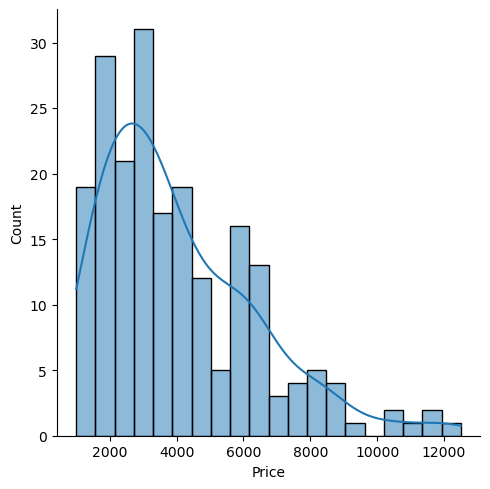

In [9]:
# 3.How are laptop prices distributed?
g= sns.displot(data=laptops, x='list_price',bins=20,kde=True)
for ax in g.axes.flat:
    ax.set(xlabel='Price')

### Most price are between 2000 and 6000

### Few unit are more than 10,000.

In [10]:
# 4.What are the min, max, and mean display sizes?
laptops.display_size.describe()

count    205.000000
mean      14.579805
std        1.109458
min       12.000000
25%       13.300000
50%       14.000000
75%       15.600000
max       18.400000
Name: display_size, dtype: float64

### The min is 12 inch and the max is 18.4 inch. The mean is 14.57 inch

In [11]:
# 5.What is the average price for each brand?
prices=laptops.groupby(['brand']).mean()[['list_price']]
prices=prices.reset_index().rename(columns={'list_price': 'average_price'}).sort_values('average_price',ascending=False)
prices

,brand,average_price
7,MSI,9071.000000
1,Apple,7082.288158
8,Microsoft,5132.333333
5,Huawei,4040.666667
3,Dell,3872.029412
2,Asus,3393.090909
4,HP,3382.541667
0,Acer,2773.083333
6,Lenovo,2216.391304


In [25]:
g= sns.displot(data=laptops, x='list_price',bins=20,kde=True)
for ax in g.axes.flat:
    ax.set(title='Average laptops price by brand',
           ylabel='Brand',xlabel='Price')

## Section 2

In [12]:
# 6.What is the average laptop price for each processor brand?
laptops.processor_type.value_counts()

 Intel Core i5-8250U        38
 Intel Core i7-8550U        28
 Intel Core i7-8565U        24
 Intel Core i5 Dual Core    19
 Intel Core i5-8265U        17
 Intel Celeron N4000        11
 Intel Core i3-7020U         8
 Intel Core i5 Quad Core     8
 Intel Core i7-7500U         8
 Intel Core i5-7200U         7
 Intel Core i3-6006U         6
 Intel Core i7 6 Core        5
 Intel Core i3-8145U         4
 Intel Core i7 Quad Core     3
 Intel Core i7-7700HQ        2
 Intel Core i7-7820HK        2
 Intel Core i3-8130U         2
 Intel Celeron N3350         2
 Intel Celeron N3060         2
 Intel Core i7-8750H         2
 Intel Core M3               2
 Intel Core i9               1
 Intel Core i7-6700HQ        1
 Intel Core i3-5005U         1
 AMD A9-9425                 1
 Intel Celeron 4205U         1
Name: processor_type, dtype: int64

In [13]:
# Extract brand name from processor column
laptops['processor_brand'] = laptops.apply(lambda x: x.processor_type.split(' ')[1].strip(),axis=1)

In [14]:
# Group by brand
avgProcessorPrices = laptops.groupby('processor_brand').list_price.mean().reset_index().sort_values('list_price',ascending=False)
avgProcessorPrices

,processor_brand,list_price
1,Intel,4050.3625
0,AMD,1999.0000


In [15]:
g = sns.catplot(data=avgProcessorPrices, x='processor_brand',y='list_price',kind='bar')
for ax in g.axes.flat:
    ax.set(title =' Average laptop price by processor brand',
          ylabel='Price',xlabel='Processor_brand')

In [16]:
# 7.What are the average ratings for each laptop brand?
laptops.ratings_5max.value_counts()

0 / 5      133
4.0 / 5     10
4.4 / 5      9
3.9 / 5      9
5.0 / 5      7
4.1 / 5      6
4.2 / 5      5
3.7 / 5      5
3.3 / 5      4
3.8 / 5      4
3.6 / 5      4
4.6 / 5      4
4.3 / 5      2
4.9 / 5      1
4.5 / 5      1
3.0 / 5      1
Name: ratings_5max, dtype: int64

In [17]:
## Convert ratings to numberic
laptops['ratings'] = laptops.apply(lambda x: round(float(x.ratings_5max.split('/')[0]),1),axis=1)

In [26]:
rate = laptops.drop(laptops[laptops['ratings'] == 0].index)
rate.head()

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,list_price,ratings_5max,processor_brand,ratings,graphics_brand
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,3.3 / 5,Intel,3.3,Intel
5,Dell,Vostro 5471,14.0,Intel Core i7-8550U,AMD Radeon 530 (4 GB),128 GB SSD/1 TB HDD,3799.0,3799.0,3.8 / 5,Intel,3.8,AMD
6,Apple,MacBook Air (Retina),13.3,Intel Core i5 Dual Core,Intel UHD Graphics 617,128 GB (PCIe SSD),4649.0,5199.0,4.0 / 5,Intel,4.0,Intel
7,Huawei,MateBook D,15.6,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),128 GB SSD/1 TB HDD,2449.0,2799.0,4.4 / 5,Intel,4.4,NVIDIA
16,Apple,MacBook Pro (Retina + Touch Bar),13.3,Intel Core i5 Quad Core,Intel Iris Plus Graphics 655,512 GB SSD,7599.0,8499.0,4.4 / 5,Intel,4.4,Intel


In [19]:
rate.ratings.value_counts()

4.0    10
4.4     9
3.9     9
5.0     7
4.1     6
4.2     5
3.7     5
3.3     4
3.8     4
3.6     4
4.6     4
4.3     2
4.9     1
4.5     1
3.0     1
Name: ratings, dtype: int64

In [20]:
ratings=rate.groupby(['brand']).mean()[['ratings']]
ratings=ratings.reset_index().sort_values('ratings',ascending=False)
ratings

,brand,ratings
1,Apple,4.335000
2,Asus,4.333333
4,HP,4.225000
5,Huawei,4.157143
7,Microsoft,4.100000
3,Dell,3.980000
6,Lenovo,3.830769
0,Acer,3.800000


In [27]:
g = sns.catplot(data=ratings, x='ratings',y='brand',kind='bar')
for ax in g.axes.flat:
    ax.set(title =' Average laptop ratings by brand',
          ylabel='Brand',xlabel='Ratings')

### The table show average rating for each brand

In [21]:
# 8.What is the average price for each graphics card brand?
laptops.graphics_card.value_counts()

 NVIDIA GeForce MX150 (2 GB)           25
 Intel UHD Graphics 620                24
 Intel GMA HD                          15
 NVIDIA GeForce MX130 (2 GB)           13
 Intel HD Graphics 620                 12
 Intel UHD Graphics 617                12
 AMD Radeon 530 (2 GB)                  7
 NVIDIA GeForce MX110 (2 GB)            6
 AMD Radeon 520 (2 GB)                  6
 Intel HD Graphics 600                  5
 Intel UHD Graphics 600                 5
 Intel Iris Plus Graphics 645           4
 Intel Iris Plus Graphics 640           4
 Intel Iris Plus Graphics 655           4
 NVIDIA GeForce MX150 (4 GB)            4
 AMD Radeon 530 (4 GB)                  4
 Intel Graphics 620                     4
 NVIDIA GeForce MX250 (4 GB)            3
 Radeon Pro 560X GDDR5 (4 GB)           3
 Radeon Pro 555X GDDR5 (4 GB)           3
 NVIDIA GeForce MX130 (4 GB)            3
 Intel HD Graphics 520                  3
 AMD Radeon R5-M340 (2 GB)              2
 NVIDIA GeForce 940MX (2 GB)      

In [22]:
# Extract the graphics card brand from card name
laptops['graphics_brand'] = laptops.apply(lambda x: x.graphics_card.split(' ')[1], axis = 1)

In [23]:
# Group by brand and calculate the average
graphics = laptops.groupby('graphics_brand').list_price.mean()
graphics = graphics.reset_index().sort_values('list_price',ascending=False)
graphics

,graphics_brand,list_price
3,Radeon,10739.000000
2,NVIDIA,4222.281690
1,Intel,3729.692574
0,AMD,2946.884615


In [28]:
g = sns.catplot(data=graphics, x='graphics_brand',y='list_price',kind='bar')
for ax in g.axes.flat:
    ax.set(title =' Average price graphics card by brand',
          ylabel='Price',xlabel='GraphicsCard_Brand')

In [32]:
# 9. What percent of laptops have a discount price?
# Use lambda to determine if a discount is available
laptops['discounted']=laptops.apply(lambda x: 1 if x.discount_price !=x.list_price else 0, axis=1)

# Calculate the percent have be discounted
percent = laptops.discounted.sum() / laptops.laptop_name.count()
percent

0.4950980392156863

### 49.5% discounted

In [36]:
# 10.How is disk space related to the price?
laptops.disk_space.value_counts()

 1 TB HDD                             60
 256 GB SSD                           21
 512 GB SSD                           15
 128 GB M.2 SSD/1 TB HDD              13
 128 GB SSD/1 TB HDD                  11
 500 GB HDD                            8
 64 GB (eMMC)                          7
 128 GB (PCIe SSD)                     6
 256 GB (PCIe SSD)                     6
 256 GB PCIe NVMe M.2 SSD              6
 2 TB HDD                              6
 512 GB PCIe NVMe M.2 SSD              5
 128 GB SSD                            5
 1 TB PCIe NVMe M.2 SSD                5
 16 GB (Optane)/1 TB HDD               4
 256 GB SSD/1 TB HDD                   4
 512 GB NVMe M.2 SSD                   3
 256 GB NVMe M.2 SSD/1 TB HDD          3
 256 GB M.2 SSD/1 TB HDD               3
 1 TB SSD                              2
 128 GB PCIe NVMe M.2 SSD/1 TB HDD     2
 8 GB (Cache Flash)/1 TB HDD           2
 256 GB (PCIe Flash)                   1
 128 GB M.2 SSD                        1
 128 GB (PCIe Fl

In [38]:
# Convert disk_space strings to int type
def isolateDiskSpace(row):
    storageType = row.disk_space.split(' ')[2]
    storageVal = row.disk_space.split(' ')[1]
    spaceGB = 0
    if storageType == 'GB':
        spaceGB = int(storageVal)
    elif storageType == 'TB':
        spaceGB = (int(storageVal)*1000)
    return spaceGB

In [42]:
# Apply function for each row
laptops['disk_space_GB']= laptops.apply(isolateDiskSpace, axis = 1)

In [43]:
laptops.disk_space_GB.value_counts()

1000    67
256     46
128     40
512     24
500      8
64       7
2000     6
16       4
8        2
32       1
Name: disk_space_GB, dtype: int64

In [44]:
laptops.plot(x='list_price', y='disk_space_GB', kind='scatter')

<AxesSubplot:xlabel='list_price', ylabel='disk_space_GB'>

### Base on the scatter plot above, it's difficult to see a relationship between display size and price

In [34]:
# 11.How is display size related to price?
laptops.plot(x='list_price', y = 'disk_space', kind= 'scatter')

<AxesSubplot:xlabel='list_price', ylabel='disk_space'>

### Base on the scatter plot above, it's difficult to see a relationship between display size and price